In [1]:
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [3]:
!pip install pandas

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import axes3d, Axes3D


In [31]:
data=np.loadtxt('ex1data1.txt',delimiter=',',usecols=(0,1))

In [32]:
data

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

In [33]:
# X is feature, y is label
X = data[:, 0]
y = data[:, 1]
m = y.size

In [37]:
X

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [10]:
m

97

In [12]:
plt.ion()
plt.figure(0)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

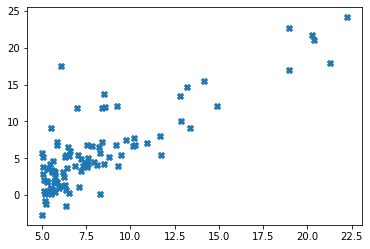

In [15]:
plt.scatter(X,y,marker="X")
plt.show()

### Gradient ascent

In [39]:
X[1]

5.5277

In [19]:
theta

array([0., 0.])

In [44]:
#compute the loss of one choice of theta

def compute_loss(X,y,theta):
    m=y.size
    cost=0
    for i in range(m):
        sub=(np.dot(X[i],theta)-y[i])**2
        cost+=sub
    return cost/(2*m)


    

In [45]:
def gradient_descent(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):
        # ===================== Your Code Here =====================
        # Instructions : Perform a single gradient step on the parameter vector theta
        #
        # Hint: X.shape = (97, 2), y.shape = (97, ), theta.shape = (2, )

        for j in range(m):
            theta[0]-=(alpha*(np.dot(X[j],theta)-y[j])*X[j][0])/m
            theta[1]-=(alpha*(np.dot(X[j],theta)-y[j])*X[j][1])/m
            
            
        # ===========================================================
        # Save the cost every iteration
        J_history[i] = compute_loss(X, y, theta)

    return theta, J_history

In [48]:
X=data[:,0]
X = np.c_[np.ones(m), X]  # Add a column of ones to X
theta = np.zeros(2)  # initialize fitting parameters # theta is the vector of weights
# Some gradient descent settings
iterations = 1500
alpha = 0.01
theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

In [49]:
theta

array([-3.58839217,  1.12367116])

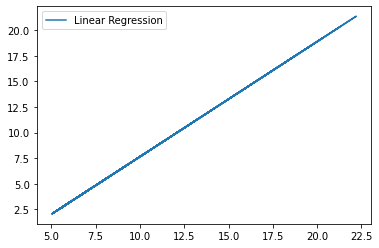

In [50]:
plt.figure(0)
line1, = plt.plot(X[:, 1], np.dot(X, theta), label='Linear Regression')
plt.legend(handles=[line1])


C:\Users\B01\AppData\Local\Temp\ipykernel_18788\428327345.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig1.gca(projection='3d')


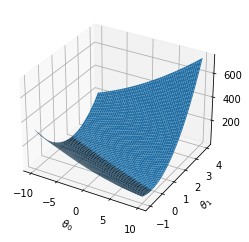

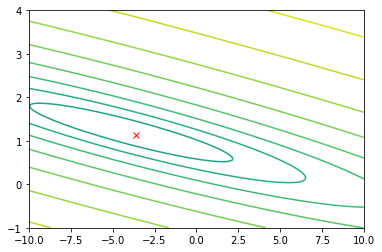

In [52]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

xs, ys = np.meshgrid(theta0_vals, theta1_vals)
J_vals = np.zeros(xs.shape)

# Fill out J_vals
for i in range(0, theta0_vals.size):
    for j in range(0, theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i][j] = compute_loss(X, y, t)

J_vals = np.transpose(J_vals)

fig1 = plt.figure(1)
ax = fig1.gca(projection='3d')
ax.plot_surface(xs, ys, J_vals)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

plt.figure(2)
lvls = np.logspace(-2, 3, 20)
plt.contour(xs, ys, J_vals, levels=lvls, norm=LogNorm())
plt.plot(theta[0], theta[1], c='r', marker="x")

In [53]:
J_history.size

1500

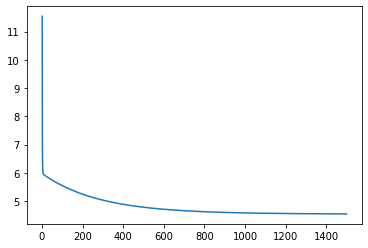

In [54]:
iter=[i for i in range(1,1501)]
plt.figure(0)
plt.plot(iter,J_history)
plt.show()